# Hough直线变换

学习如何在一张图片中检测直线。

如果你要检测的形状可以用数学表达式写出来，你就可以使用霍夫变换检测它。

opencv中使用极坐标表示直线，原点是已知且确定的，因此，每一个像素点都可以确定一条直线。

$\rho = x\cdot cos\theta + y\cdot sin\theta$

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

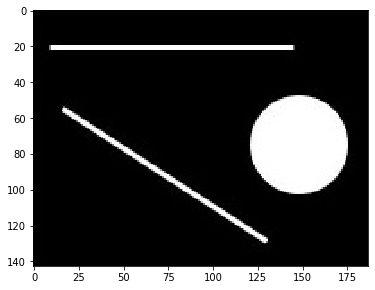

In [42]:
img = cv2.imread('./imgdata/lines.jpg')
cv2.cvtColor(src=img, code=cv2.COLOR_BGR2RGB, dst=img)
plt.figure(figsize=[6, 6])
plt.imshow(img)
plt.show()

`cv2.HoughLines(image, rho, theta, threshold[, lines[, srn[, stn[, min_theta[, max_theta]]]]])`

参数1：要检测的二值图（一般是阈值分割或边缘检测后的图）
参数2：距离r的精度，值越大，考虑越多的线
参数3：角度θ的精度，值越小，考虑越多的线
参数4：累加数阈值，值越小，考虑越多的线

(-1000, 21) (999, 21)
(-1000, 19) (999, 19)
(-858, -514) (819, 574)
(-859, -512) (817, 577)


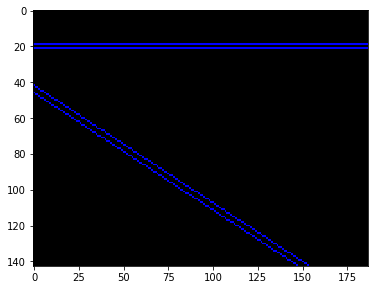

In [45]:
img_gray = cv2.imread('./imgdata/lines.jpg', 0)
h, w = img_gray.shape

# 对灰度图像进行边缘检测（很重要的一步）
edges = cv2.Canny(img_gray, threshold1=50, threshold2=150, apertureSize=3)

lines = cv2.HoughLines(edges, rho=0.8, theta=np.pi/180, threshold=90)
drawing = np.zeros([h, w, 3], dtype=np.uint8)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * a)
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * a)
    print((x1, y1), (x2, y2))
    cv2.line(drawing, (x1, y1), (x2, y2), (0, 0, 255))

plt.figure(figsize=[6, 6])
plt.imshow(drawing)
plt.show()

`cv2.HoughLinesP(image, rho, theta, threshold[, lines[, minLineLength[, maxLineGap]]])`

+ 前面的参数和`cv2.HoughLines()`的一样
+ minLIneLength:线的最短长度，比这个短的线都会被忽略
+ MaxLineGap:两条线段之间的最大间隔，如果小于此值，这两条直线就会被看做一条直线

函数的返回值就是直线的起点和终点。

从上边的例子我们可以发现，仅仅是一条直线都需要两个参数，这需要大量的计算。`Probabilistic_Hough_Transform` 是对霍夫变换的一种优化。它不会对每一个点都进行计算，而是从一幅图像中随机选取一个点集进行计算，虽对于直线检测来说这已经足够。但是 使用这种变换我们必须降低阈值，因为考虑的总的点数都变少了，阈值必须要下降 。 

下图是对两种方法的对比。 

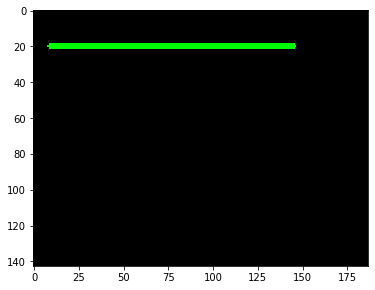

In [72]:
img = cv2.imread('./imgdata/lines.jpg')
cv2.cvtColor(img, cv2.COLOR_BGR2GRAY, img)
fig = np.zeros(img.shape, dtype=np.uint8)

egdes = cv2.Canny(img, 50, 150, apertureSize=3)
minLineLength = 30
maxLineGap = 10

lines = cv2.HoughLinesP(image=egdes, 
                        rho=0.8, 
                        theta=np.pi/180, 
                        threshold=45, 
                        minLineLength=minLineLength, 
                        maxLineGap=maxLineGap)
for line in lines[0]:
    x1, y1, x2, y2 = line
    cv2.line(fig, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.figure(figsize=[6,6])
plt.imshow(fig)
plt.show()